# 틱 데이터 받기

In [1]:
import fxcmpy
API_TOKEN = "188b129afc33f2493f4f3e72673cf3ed9ebd7e8e"
api = fxcmpy.fxcmpy(access_token=API_TOKEN, log_level='error')

In [2]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

plt.style.use('classic')
mpl.rcParams['font.family'] = 'serif'

In [3]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [4]:
start = dt.datetime(2018, 6, 25)
stop = dt.datetime(2018, 6, 30)

td = tdr('USDJPY', start, stop)

td.get_raw_data().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1426032 entries, 06/24/2018 21:00:17.081 to 06/29/2018 20:58:50.815
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Bid     1426032 non-null  float64
 1   Ask     1426032 non-null  float64
dtypes: float64(2)
memory usage: 32.6+ MB


In [5]:
td.get_data().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1426032 entries, 2018-06-24 21:00:17.081000 to 2018-06-29 20:58:50.815000
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Bid     1426032 non-null  float64
 1   Ask     1426032 non-null  float64
dtypes: float64(2)
memory usage: 32.6 MB


In [6]:
td.get_data()

,Bid,Ask
2018-06-24 21:00:17.081,109.841,109.889
2018-06-24 21:01:05.688,109.846,109.884
2018-06-24 21:01:30.545,109.847,109.885
2018-06-24 21:01:34.041,109.847,109.888
2018-06-24 21:01:34.043,109.847,109.895
...,...,...
2018-06-29 20:58:45.467,110.666,110.704
2018-06-29 20:58:46.094,110.668,110.704
2018-06-29 20:58:50.411,110.666,110.704
2018-06-29 20:58:50.545,110.666,110.705


<AxesSubplot:>

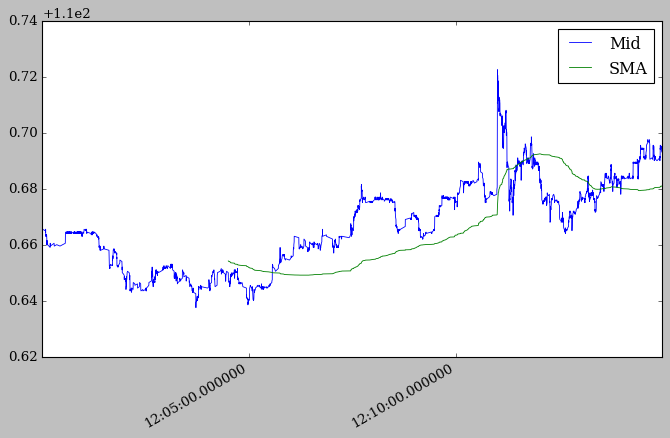

In [7]:
sub = td.get_data(start ='2018-06-29 12:00:00', end ='2018-06-29 12:15:00')
sub['Mid'] = sub.mean(axis=1)
sub['SMA'] = sub['Mid'].rolling(1000).mean()
sub[['Mid', 'SMA']].plot(figsize=(10,6), lw=0.75)

# candle data input

In [8]:
# check symbol fxcm have
from fxcmpy import fxcmpy_candles_data_reader as cdr

print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [9]:
# data input

start = dt.datetime(2018, 5, 1)
end = dt.datetime(2018, 6, 30)

# 1m : m1, 1h : H1, 1d : D1
period = 'H1'
candles = cdr("EURUSD", start, end, period)
data = candles.get_data()
data

,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose
2018-04-29 21:00:00,1.21226,1.21299,1.21226,1.21277,1.21249,1.21311,1.21248,1.21289
2018-04-29 22:00:00,1.21277,1.21287,1.21202,1.21215,1.21289,1.21291,1.21203,1.21217
2018-04-29 23:00:00,1.21215,1.21228,1.21190,1.21227,1.21217,1.21230,1.21190,1.21228
2018-04-30 00:00:00,1.21227,1.21319,1.21217,1.21286,1.21228,1.21321,1.21218,1.21288
2018-04-30 01:00:00,1.21286,1.21341,1.21214,1.21333,1.21288,1.21343,1.21216,1.21334
...,...,...,...,...,...,...,...,...
2018-06-29 16:00:00,1.16768,1.16820,1.16731,1.16769,1.16769,1.16820,1.16732,1.16771
2018-06-29 17:00:00,1.16769,1.16826,1.16709,1.16781,1.16771,1.16827,1.16711,1.16782
2018-06-29 18:00:00,1.16781,1.16816,1.16668,1.16684,1.16782,1.16817,1.16669,1.16686
2018-06-29 19:00:00,1.16684,1.16792,1.16638,1.16774,1.16686,1.16794,1.16640,1.16775


<AxesSubplot:>

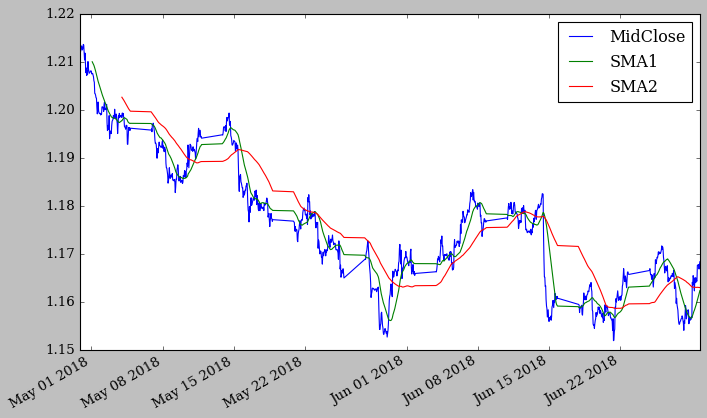

In [10]:
# 종가의 중간가격을 계산하고 두개의 이동평균선을 그린다.
data['MidClose'] = data[['BidClose', 'AskClose']].mean(axis=1)

data['SMA1'] = data["MidClose"].rolling(30).mean()
data['SMA2'] = data['MidClose'].rolling(100).mean()

data[['MidClose', 'SMA1', 'SMA2']].plot(figsize=(10,6))

# use API

In [11]:
# 상품 데이터 확인 
instruments = api.get_instruments()
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'VOLX', 'USDOLLAR', 'US2000', 'INDIA50', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'USOilSpot', 'UKOilSpot', 'WHEATF', 'CORNF', 'GasolineF', 'HeatingOilF', 'LCattleF', 'Bund', '5USNote', '10USNote', '2USNote', 'Bobl', 'Schatz', 'FED30D', 'EURIBOR3M', 'EURDLR3M', 'SONIA3M', 'IBHY', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'ESPORTS', 'BIOTECH', 'CANNABIS', 'FAANG', 'CHN.TECH', 'CHN.ECOMM', 'USEquities', 'AIRLINES', 'CASINOS', 'TRAVEL', 

In [12]:
# period : m1, m5, m15, m30, H1, H2, H3, H4, H6, H8, D1, W1, M1
# number : 최근 n 기간

# 예시 : 최근 10일 간의 'USD/JPY' data
candles = api.get_candles('USD/JPY', period='D1', number=10)
candles

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2022-11-11 22:00:00,140.952,138.748,142.478,138.456,141.024,138.806,142.493,138.468,479410
2022-11-13 22:00:00,138.434,139.095,139.131,138.421,138.532,139.138,139.226,138.524,371
2022-11-14 22:00:00,139.097,139.873,140.796,138.792,139.186,139.928,140.808,138.809,527398
2022-11-15 22:00:00,139.880,139.253,140.622,137.654,139.924,139.310,140.634,137.676,683991
2022-11-16 22:00:00,139.251,139.468,140.288,138.724,139.315,139.564,140.301,138.740,558968
2022-11-17 22:00:00,139.430,140.186,140.739,138.870,139.555,140.209,140.748,138.883,476275
2022-11-18 22:00:00,140.182,140.331,140.496,139.630,140.213,140.396,140.507,139.640,410147
2022-11-20 22:00:00,140.135,140.284,140.289,140.135,140.259,140.408,140.408,140.248,7
2022-11-21 22:00:00,140.312,142.110,142.249,140.152,140.428,142.118,142.260,140.171,351300


In [13]:
# start : 시작 기간
# stop : 종료 기간
start = dt.datetime(2017, 1,1)
end = dt.datetime(2018, 1,1)

candles = api.get_candles('EUR/GBP', period='D1', start=start, stop=end)
candles

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2017-01-03 22:00:00,0.85263,0.85007,0.85292,0.84496,0.85450,0.85039,0.85450,0.84510,312049
2017-01-04 22:00:00,0.85007,0.85090,0.85369,0.84788,0.85039,0.85121,0.85386,0.84806,300842
2017-01-05 22:00:00,0.85090,0.85355,0.85814,0.85053,0.85121,0.85467,0.85829,0.85093,385735
2017-01-06 22:00:00,0.85355,0.85683,0.85888,0.85320,0.85467,0.85811,0.85903,0.85345,260916
2017-01-08 22:00:00,0.85683,0.85944,0.85958,0.85683,0.85811,0.85984,0.86013,0.85811,294
...,...,...,...,...,...,...,...,...,...
2017-12-26 22:00:00,0.88722,0.88653,0.88924,0.88632,0.88859,0.88672,0.88940,0.88654,58494
2017-12-27 22:00:00,0.88653,0.88661,0.88866,0.88533,0.88672,0.88764,0.88879,0.88544,123947
2017-12-28 22:00:00,0.88661,0.88826,0.88939,0.88611,0.88764,0.88885,0.88948,0.88670,116361


<AxesSubplot:xlabel='date'>

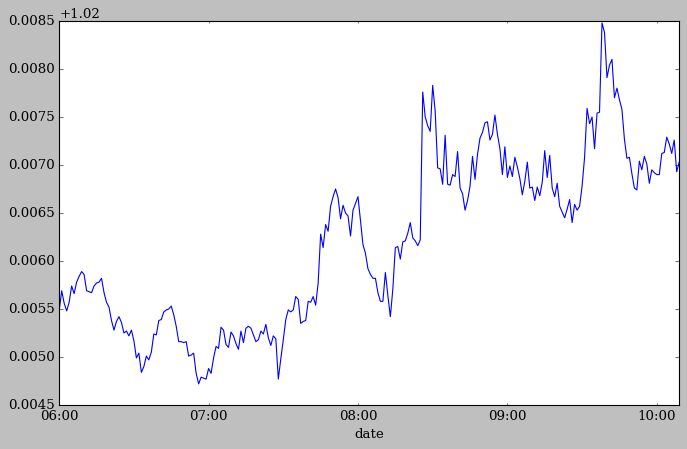

In [14]:
candles = api.get_candles("EUR/USD", period='m1', number=250)
candles['askclose'].plot(figsize=(10,6))

# get streaming data

In [15]:
def output(data, dataframe) : 
    print(f"{len(dataframe)} | {data['Symbol']} | {pd.to_datetime(int(data['Updated']), unit='ms')} | {data['Rates'][0], data['Rates'][1]}")

# 실시간 데이터 수신시작
api.subscribe_market_data('EUR/USD', (output,))

# 수신 중에 마지막 가격
api.get_last_price("EUR/USD")

Bid     1.02696
Ask     1.02703
High    1.03337
Low     1.02222
Name: 2022-11-22 10:10:03.561000, dtype: float64

In [16]:
# 실시간 데이터 수신 종료
api.unsubscribe_market_data("EUR/USD")

2 | EUR/USD | 2022-11-22 10:10:03.756000 | (1.02697, 1.0270299999999999)
3 | EUR/USD | 2022-11-22 10:10:03.756000 | (1.02697, 1.0270299999999999)


# order

In [17]:
# 현재 잔고 표시
api.get_open_positions()
# 거래 주문
order = api.create_market_buy_order('EUR/USD', 10)

In [18]:
# 현재 잔고 표시
sel = ['tradeId', 'amountK', 'currency', 'grossPL', 'isBuy']
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,123417199,10,EUR/USD,-0.50631,True


In [19]:
# 추가 주문
order = api.create_market_buy_order("EUR/GBP", 5)
# 현재 잔고 표시
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,123417199,10,EUR/USD,-0.50633,True
1,123417209,5,EUR/GBP,-0.60000,True


In [20]:
order = api.create_market_sell_order("EUR/USD", 3)
order = api.create_market_buy_order("EUR/GBP", 5)

api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,123417199,10,EUR/USD,-0.50631,True
1,123417209,5,EUR/GBP,-0.65000,True
2,123417213,3,EUR/USD,-0.17721,False
3,123417214,5,EUR/GBP,-0.65000,True


In [21]:
api.close_all_for_symbol("EUR/GBP")
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,123417199,10,EUR/USD,-0.50627,True
1,123417213,3,EUR/USD,-0.17719,False


In [22]:
api.close_all()
api.get_open_positions()

""


In [23]:
# 잔고확인
api.get_accounts().T

,0
t,6
ratePrecision,0
accountId,910321
balance,49992.28
usdMr,0
mc,N
mcDate,
accountName,00910321
usdMr3,0
hedging,Y
